# Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

# Objective:
You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 


# Exploring data

In [194]:
# Importing necessary libraries required for analysing dataset 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [195]:
# Importing our dataset 
df= pd.read_csv(r"C:\Users\hp\Dropbox\PC\Desktop\Evaluation Projects\week 3\Customer churn analysis\Telecom_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory Data Analysis & Preprocesssing

In [196]:
# As the data has been imported,lets check its shape
df.shape

(7043, 21)

In [197]:
# Now let us check the datatype of every columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [198]:
# lets check the unique values each column contains
for i in df.columns:
    print(i,':',len(df[i].unique()))
    print("________________________________")

customerID : 7043
________________________________
gender : 2
________________________________
SeniorCitizen : 2
________________________________
Partner : 2
________________________________
Dependents : 2
________________________________
tenure : 73
________________________________
PhoneService : 2
________________________________
MultipleLines : 3
________________________________
InternetService : 3
________________________________
OnlineSecurity : 3
________________________________
OnlineBackup : 3
________________________________
DeviceProtection : 3
________________________________
TechSupport : 3
________________________________
StreamingTV : 3
________________________________
StreamingMovies : 3
________________________________
Contract : 3
________________________________
PaperlessBilling : 2
________________________________
PaymentMethod : 4
________________________________
MonthlyCharges : 1585
________________________________
TotalCharges : 6531
_____________________________

In [199]:
# From above we get the unique value each column contains.
# Now let us check the value count of each unique values every column contains.

for i in df.columns:
    print(i,':',(df.value_counts(i)))
    print('------------*-----------*----------*-----------')


customerID : customerID
0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Length: 7043, dtype: int64
------------*-----------*----------*-----------
gender : gender
Male      3555
Female    3488
dtype: int64
------------*-----------*----------*-----------
SeniorCitizen : SeniorCitizen
0    5901
1    1142
dtype: int64
------------*-----------*----------*-----------
Partner : Partner
No     3641
Yes    3402
dtype: int64
------------*-----------*----------*-----------
Dependents : Dependents
No     4933
Yes    2110
dtype: int64
------------*-----------*----------*-----------
tenure : tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Length: 73, dtype: int64
------------*-----------*----------*-----------
PhoneService : PhoneService
Yes    6361
No      682
dtype: int64
------------*-----------*------

In [200]:
# Replacing duplicate  entries
df['MultipleLines'].replace('No phone service','No',inplace=True)
df['OnlineSecurity'].replace('No internet service','No',inplace=True)
df['OnlineBackup'].replace('No internet service','No',inplace=True)
df['DeviceProtection'].replace('No internet service','No',inplace=True)
df['TechSupport'].replace('No internet service','No',inplace=True)
df['StreamingTV'].replace('No internet service','No',inplace=True)
df['StreamingMovies'].replace('No internet service','No',inplace=True)

In [201]:
# I've groped all the duplicate entries, now let us check the value count of unique value each column contains

for i in df.columns:
    print(i,':',(df.value_counts(i)))
    print('------------*-----------*----------*-----------')

customerID : customerID
0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Length: 7043, dtype: int64
------------*-----------*----------*-----------
gender : gender
Male      3555
Female    3488
dtype: int64
------------*-----------*----------*-----------
SeniorCitizen : SeniorCitizen
0    5901
1    1142
dtype: int64
------------*-----------*----------*-----------
Partner : Partner
No     3641
Yes    3402
dtype: int64
------------*-----------*----------*-----------
Dependents : Dependents
No     4933
Yes    2110
dtype: int64
------------*-----------*----------*-----------
tenure : tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Length: 73, dtype: int64
------------*-----------*----------*-----------
PhoneService : PhoneService
Yes    6361
No      682
dtype: int64
------------*-----------*------

In [202]:
# As we can see now that there is no duplicate values present in our dataset
# Now let's check for the Null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [203]:
#Checking for empty observations
df.loc[df['TotalCharges'] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [204]:
# First changing datatype of "TotalCharges"
df["TotalCharges"]=df["TotalCharges"].str.strip()
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"])

In [205]:
# Converting " " to nan
df['TotalCharges'].replace(' ',np.nan,inplace=True)
# checking null values now
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [206]:
# We have 11 null values , we'll treat them
#Replacing nan values of TotalCharges column with it's mean
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [207]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [208]:
#Checking for empty observations again
df.loc[df['TotalCharges'] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [210]:
#Now we will look into the statistic of our dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


##### Seperating numeric and catagorical data

In [211]:
# Catagorical data

categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)
    

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [212]:
# Above we got all the object dtype column
# Now lets check for numeric column

numeric_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numeric_columns.append(i)
print(numeric_columns)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


# Data Visualization

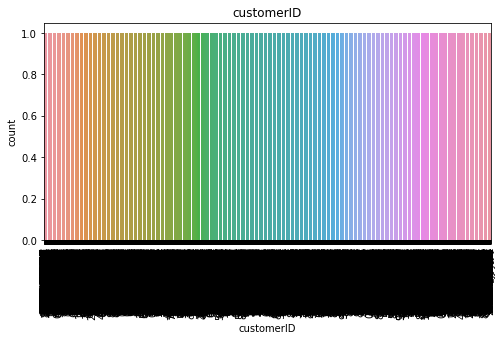

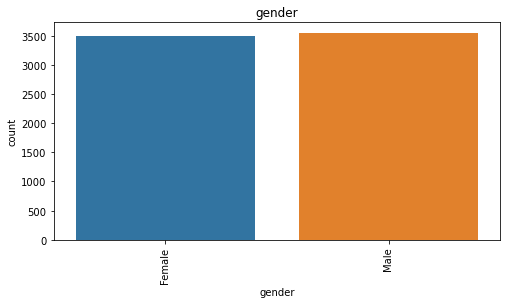

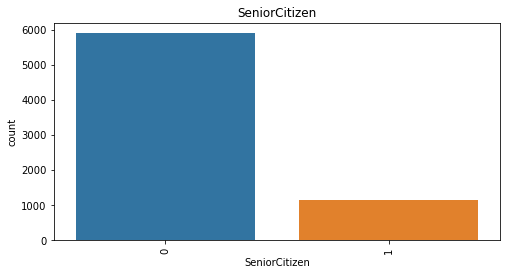

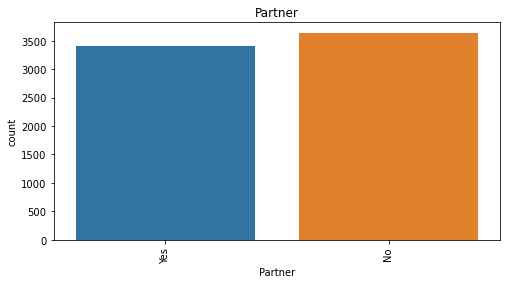

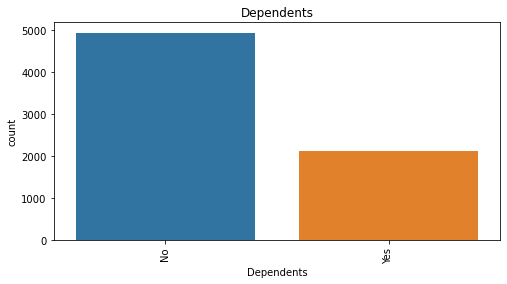

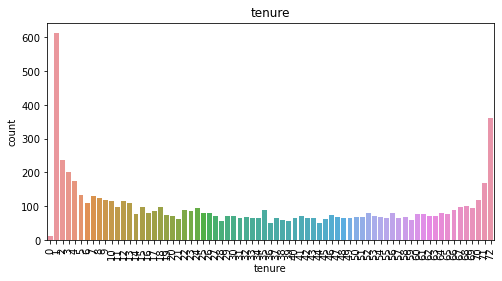

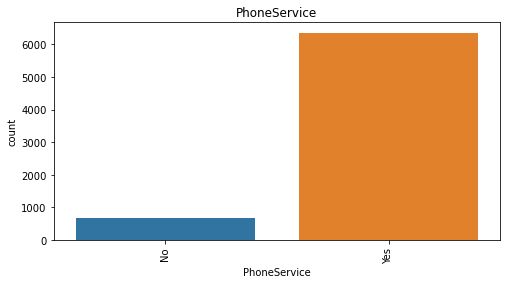

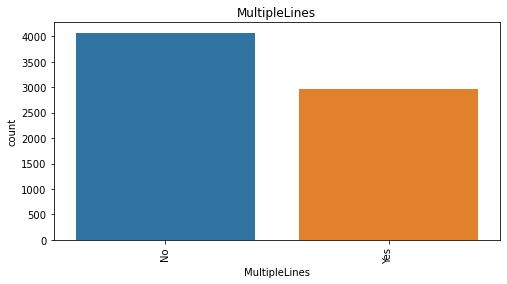

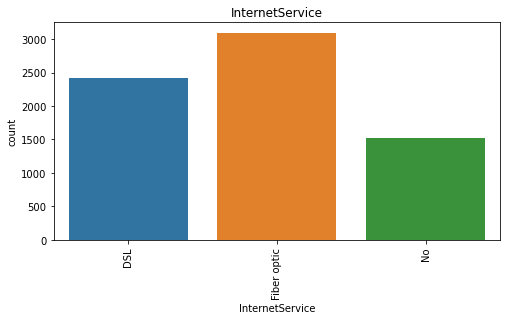

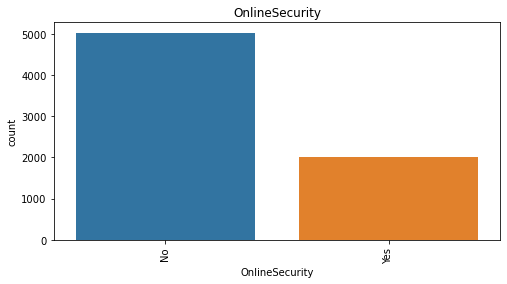

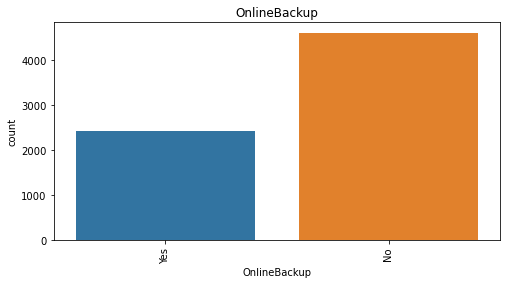

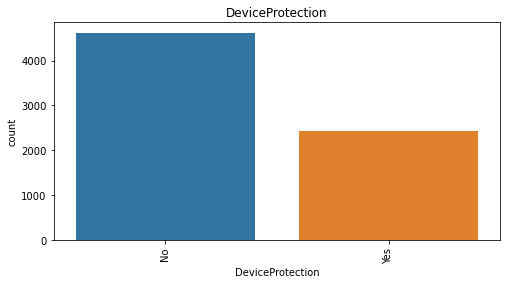

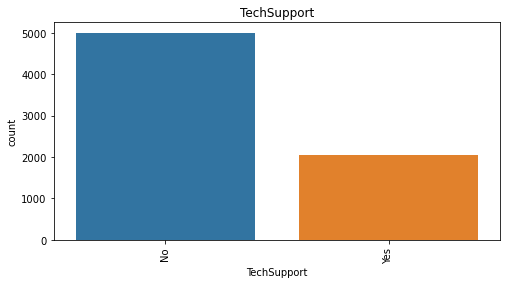

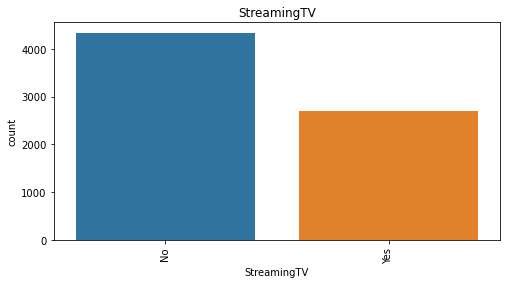

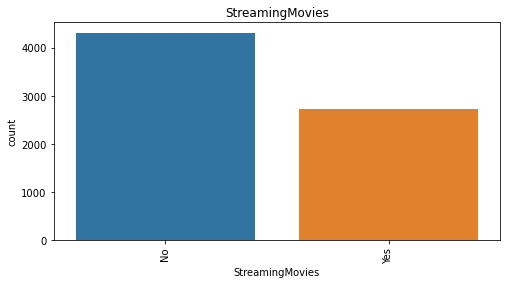

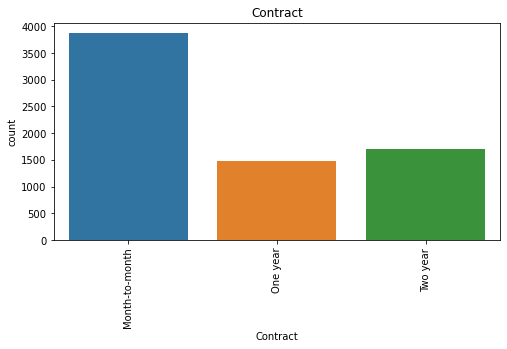

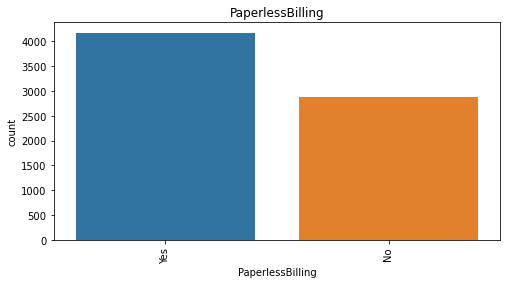

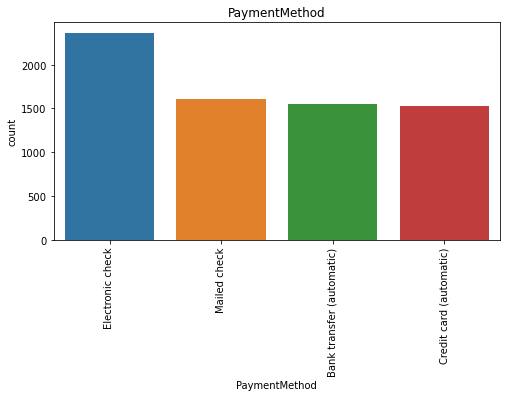

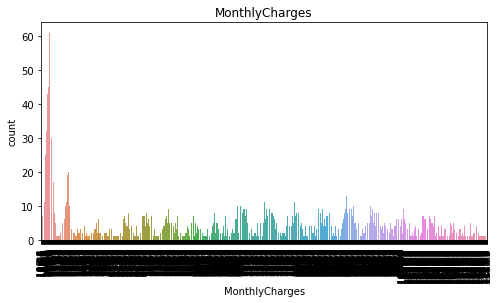

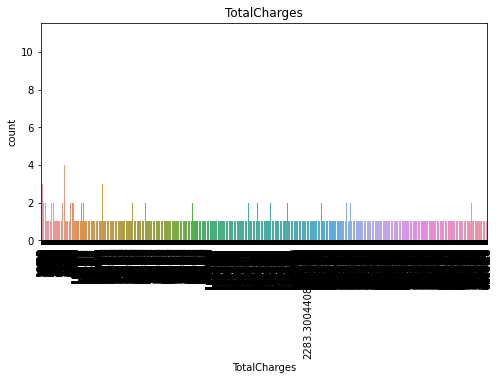

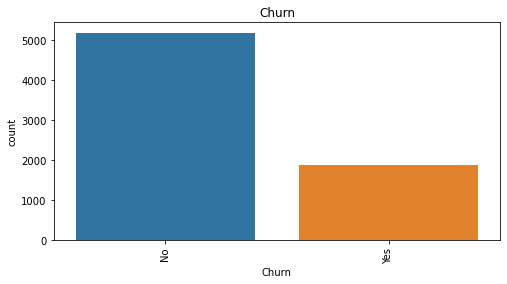

In [213]:
#  Count plot for all feature columns columns
for i in df.columns:              
    plt.figure(figsize = (8,4))
    sns.countplot(df[i])
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

### My observation from  plots above are as follows:

1) As customer id is uniques for every customer and plays no such role in detrmining customer churn, we'll dreop it.

2) The counts of male and female is almost equal equal in number (equal users).

3) AS in case of senior citizen there are more number of young("0") user then senior citizen("1") , as it' clear that younger generation is much more connected to technology than older generation.

4) The count of user having partner and single user are almost same in number.(as all uses telecommunication irrespective of the fact that they are single or not.

5) The counts of user having no dependent is higher as compare to user having any dependent.

6) The count of user having shorter tenure is high as most of us prefer short term investment in anything.
   also it suddenly increases for longer tenure as there are people who go for single time payment.
 
7) Most of the customer have "Phone Service" as its important for our day to day life.

8) Most of the customer dont have "Multiple lines" as they prefer single line more over Multiple line.

8) Most of the customer user "Fiber optic" as it's faster then comes "DLS" user.

9) Count of customer having "online security" is low , may be because less no. of user know about the concept of "online security" or maybe it's expensive so not everyone can afford it or maybe the just feel they don't need this service it's unneccesary.

10) Most of the customer don't have online backup of there data.

11) Most of the customer don't have Device Protection of there data.

12) Most of the customer don't have "Tech support" , "Streaming TV" and "Streaming Movie", as the may be exclusive and costly.

13) Most of the customer contract is from month to month as spending at once seems to be unneccesary by most of the customer.

14) Most of the customer go for paperless billing as they seems to be environment friendly, and is more convinient.

15) Most of the customer prefer Electronic billing over other method as its easy and more convinient.
   
   
### Target 

1) Count of customer churn is less, and it seems to be imbalance ,so we'll treat it later.


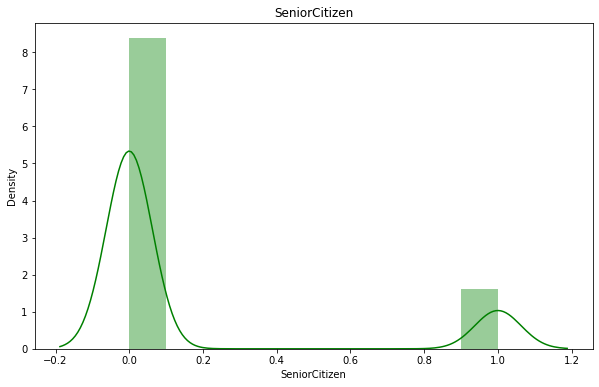

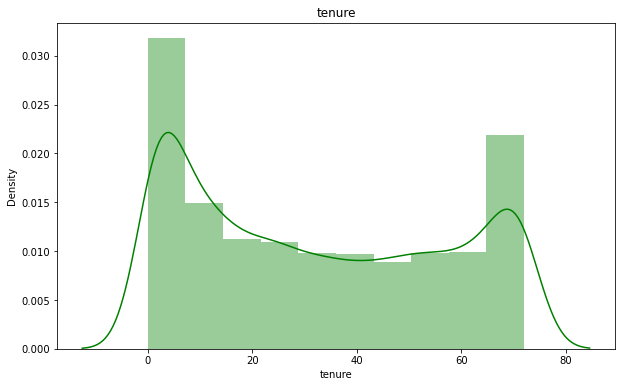

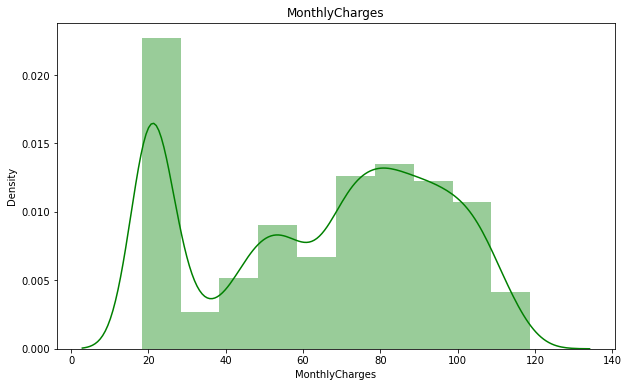

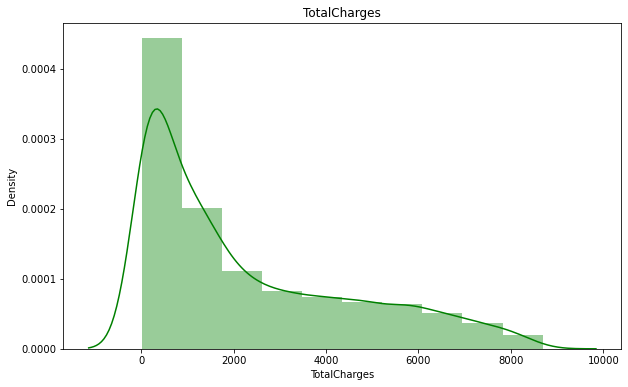

In [214]:
#Distribution plot for all numerical columns
for i in df[numeric_columns]:              
    plt.figure(figsize = (10, 6))
    sns.distplot(df[i], bins = 10, color="g")
    plt.title(i)
    plt.show()


### Observations

1) Ditribution seems to be skeweed as predicted above be me during statistical observation of our dataset.

2) Senior citizen data seems to be categorical.

3) The Frequency of user having lower monthy charge is high, as everbody want's an economical plan.

4) The Frequency of user having lower Total charge is high, as everbody want's an economical plan.

### Univariate visualization

In [215]:
# I'll drop customer id as its of no importance
df.drop(columns=['customerID'],axis=1,inplace= True)

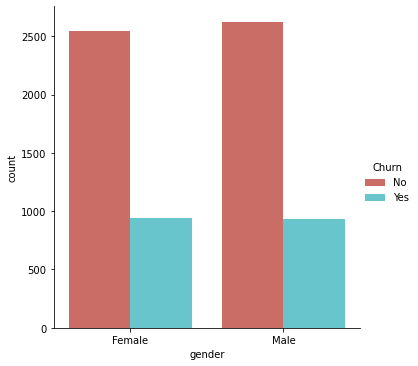

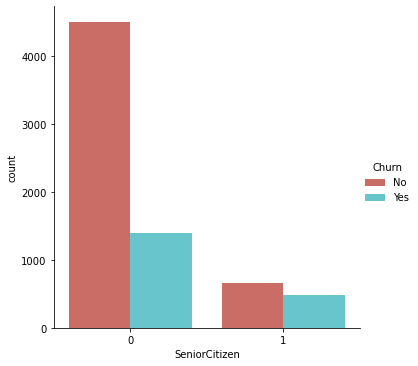

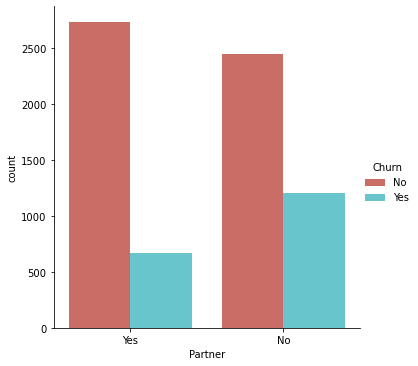

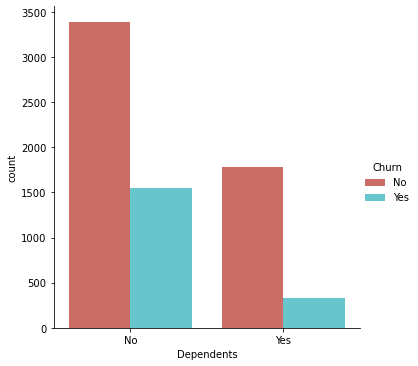

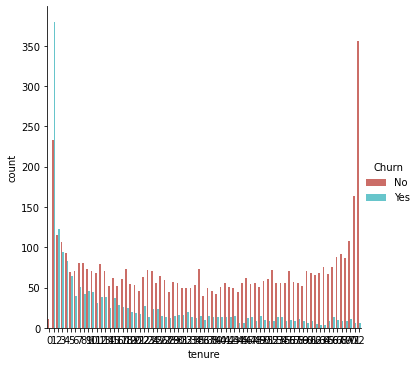

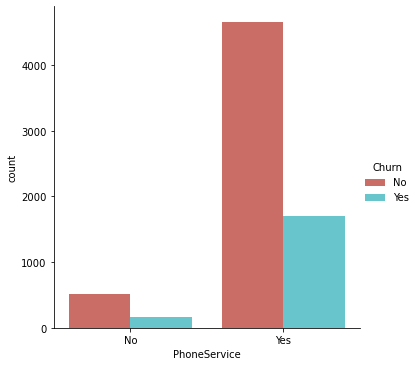

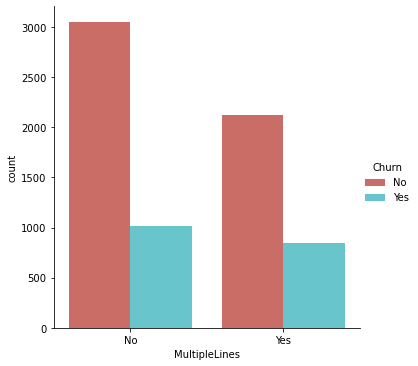

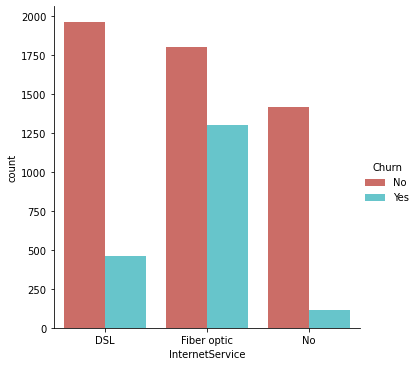

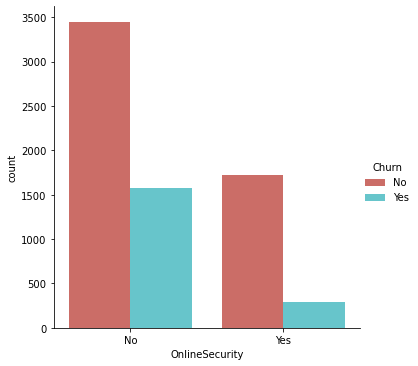

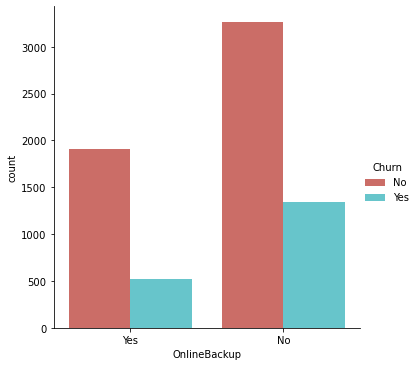

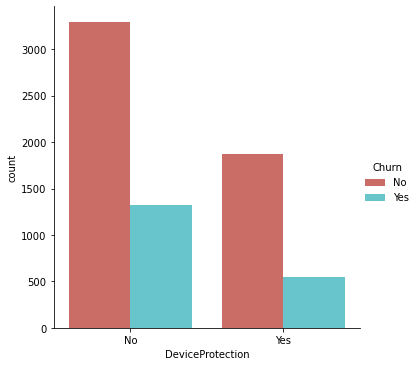

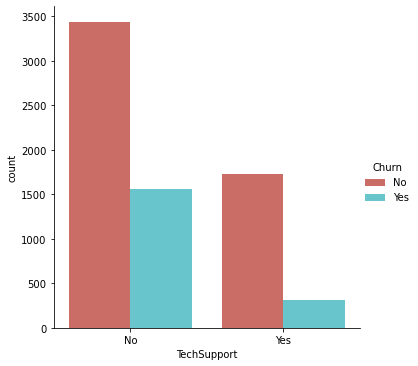

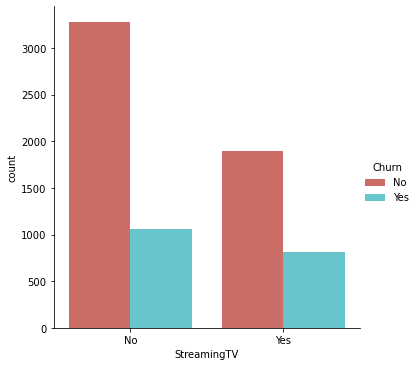

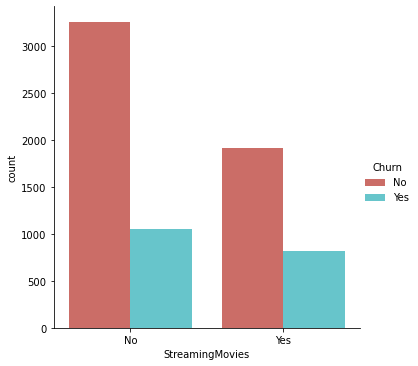

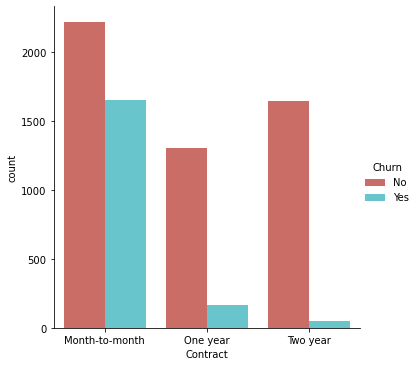

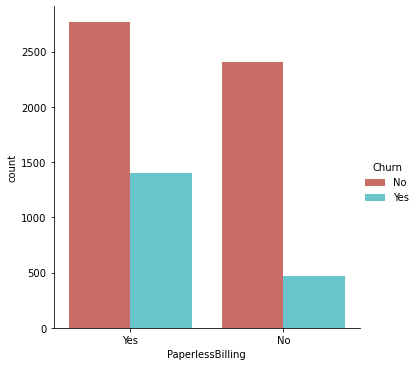

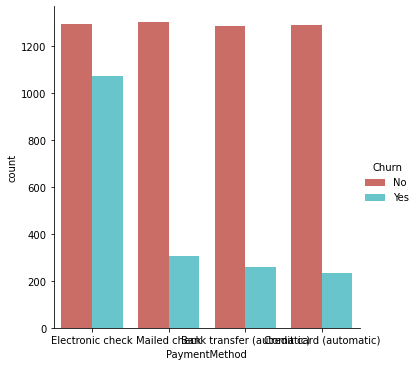

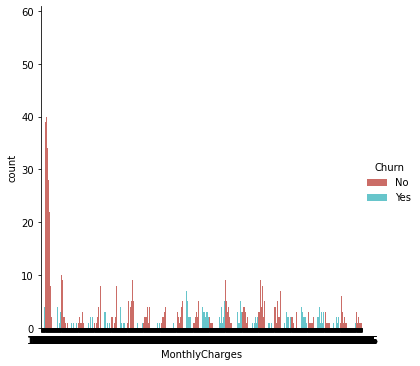

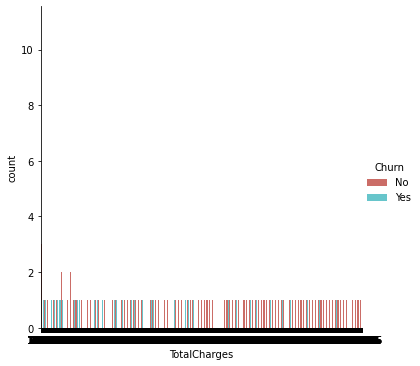

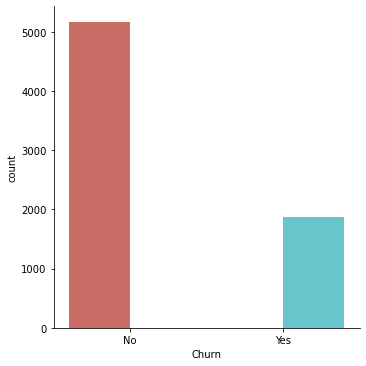

In [216]:
#Relation of features with targets
for i in df.columns:
    sns.factorplot(i,kind='count',data=df,hue='Churn',palette="hls")
    plt.xticks(rotation=0);
    


### Observations

##### The percentage of churn is high in the following:

SeniorCitizen,

customer with no partners ,

customer having no dependent,

customer with less tenure,

customer having PhoneService,

customer having MultipleLines,

customer using Fiber optics as internet service,

customer  not having OnlineSecurity,

customer  not having OnlineBackup ,

customer  not having DeviceProtection , 

customer  not having TechSupport,

customer having StreamingTV,

customer having StreamingMovies,

have month to month contract,

customer using paperless billing, 

customer using electronic check.

## Multivariate analysis

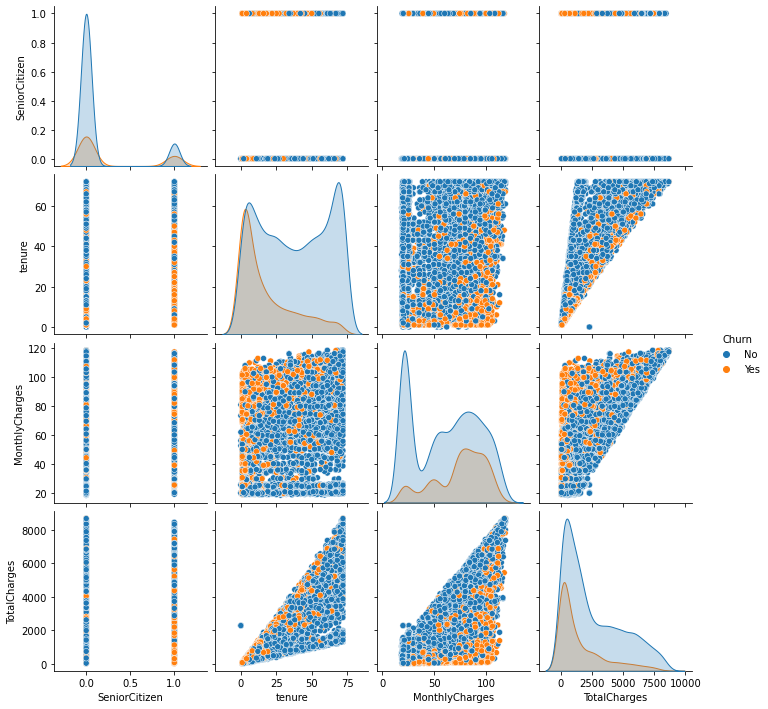

In [217]:
#pair ploting for df
sns.pairplot(df,hue="Churn")

# Data Cleaning

<AxesSubplot:>

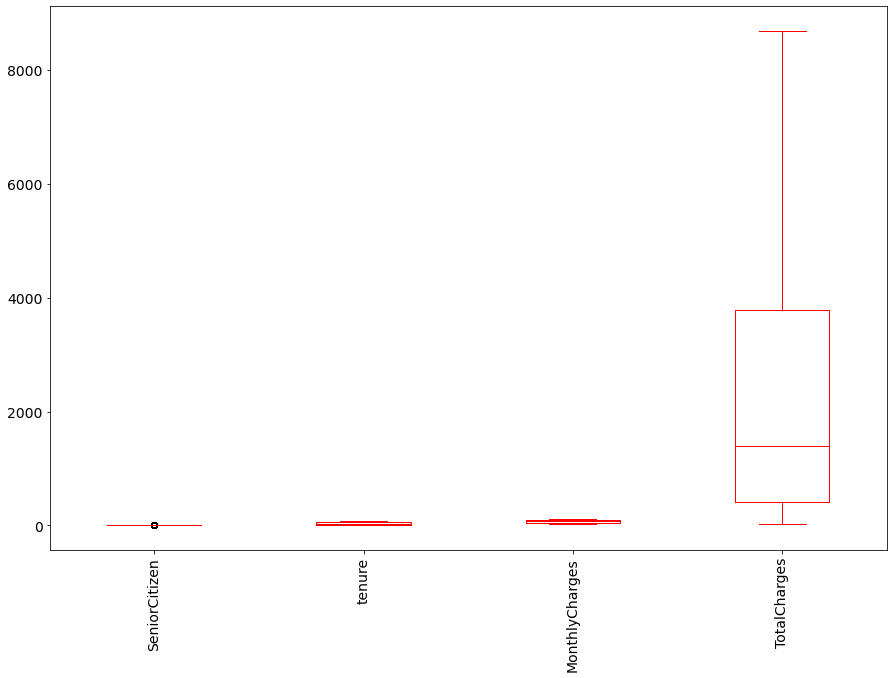

In [218]:
#Checking for outliers using boxplot
df.plot(rot = 90,kind='box',fontsize=14,figsize=(15,10),color='r')

## Checking for skewness:

In [219]:
#Checking for skewness
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

In [220]:
#Removing skewness using yeo-johnson method:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson') 

In [221]:
#Using yeo_johnson method i am removing the skewness.
df[['TotalCharges']] = scaler.fit_transform(df[['TotalCharges']].values)

In [222]:
#Checking for skewness again
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges     -0.144899
dtype: float64

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

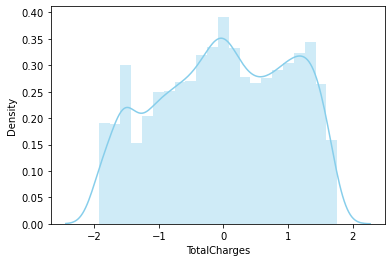

In [223]:
sns.distplot(df['TotalCharges'],color="SkyBlue")

### Encoding Catagorical Data

In [224]:
# Separating categorical columns in df
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [225]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]= OE.fit_transform(df[i].values.reshape(-1,1))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,-1.810588,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,0.253313,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,-1.387269,1.0
3,1.0,0,0.0,0.0,45,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,42.30,0.232253,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,-1.250118,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,84.80,0.295688,0.0
7039,0.0,0,1.0,1.0,72,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,103.20,1.567097,0.0
7040,0.0,0,1.0,1.0,11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,-0.859899,0.0
7041,1.0,1,1.0,0.0,4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,-0.922968,1.0


## Checking correlation using heat map:

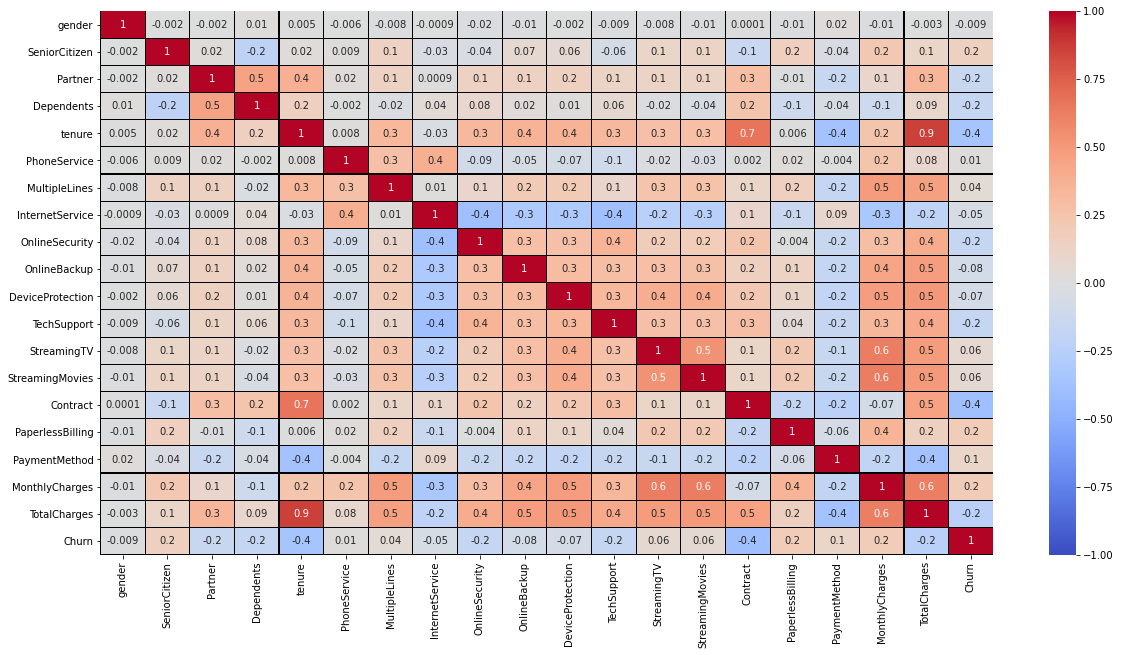

In [226]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

By looking into the heat map i can say that:

There is a multicolinearity issue between tenure and TotalCharges & Contract and tenure.Gender is very less correlated with our target. To get better insight on target correlation with other features let me plot bar plot of target correlation.

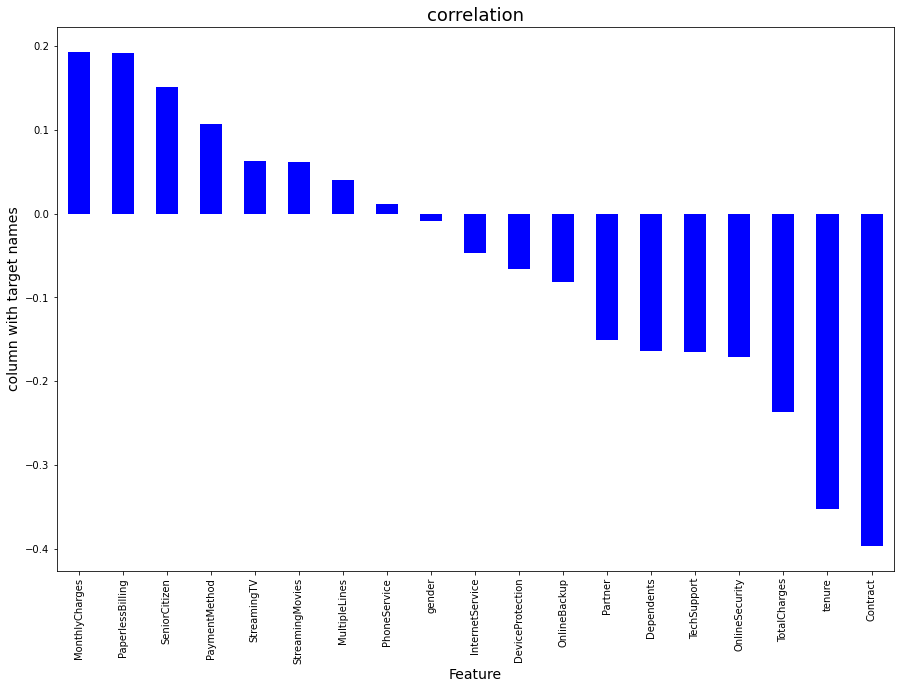

In [228]:
plt.figure(figsize=(15,10))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

### Seperating target and features

In [229]:
x = df.drop("Churn",axis=1)
y = df["Churn"]

In [230]:
#Scaling the data using standard scaler:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [231]:
# I have scaled the feature , now let's see it 
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,-0.854176,-1.183234,-0.633933,1.378241,-0.723968,-0.639439,-0.790132,-0.79607,-0.828207,0.829798,0.398558,-1.160323,-1.810588
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.854176,-1.183234,1.577454,-0.725563,1.381277,-0.639439,-0.790132,-0.79607,0.371271,-1.205113,1.334863,-0.259629,0.253313
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,-1.183234,1.577454,1.378241,-0.723968,-0.639439,-0.790132,-0.79607,-0.828207,0.829798,1.334863,-0.362660,-1.387269
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,-0.854176,-1.183234,1.577454,-0.725563,1.381277,1.563872,-0.790132,-0.79607,0.371271,-1.205113,-1.474052,-0.746535,0.232253
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,0.172250,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.79607,-0.828207,0.829798,0.398558,0.197365,-1.250118


## Checking multicollinearity using vif

In [232]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.001700,gender
1,1.149699,SeniorCitizen
2,1.463080,Partner
3,1.384360,Dependents
4,10.690330,tenure
5,1.712289,PhoneService
6,1.546815,MultipleLines
7,1.909515,InternetService
8,1.471226,OnlineSecurity
9,1.473860,OnlineBackup


In [233]:
#Droping highly VIF columns
X = X.drop(["TotalCharges"],axis=1)

In [234]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.001700,gender
1,1.149607,SeniorCitizen
2,1.460871,Partner
3,1.382066,Dependents
4,2.754518,tenure
5,1.712012,PhoneService
6,1.538487,MultipleLines
7,1.897435,InternetService
8,1.464039,OnlineSecurity
9,1.469031,OnlineBackup


### Balancing the target variable using oversampling:

In [235]:
#Checking the value count of target column
y.value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

In [236]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, y = SM.fit_resample(X,y)

In [237]:
#Checking the value count of target column again
y.value_counts()

0.0    5174
1.0    5174
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

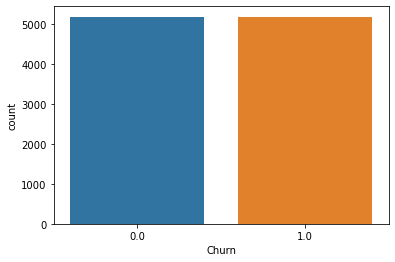

In [238]:
# Visualizing the target data after oversampling
sns.countplot(y)

# Model Building

In [240]:
# Importing necessary libraries require for model building and testing process
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [241]:
# Now we'll find the best random state
from sklearn.ensemble import RandomForestClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestClassifier()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8682769726247987  on Random_state  71


In [242]:
# Now we'll split our whole data into train and test using train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

In [254]:
# Importing necessary classification model and some libraries requires for checking which model performance is better

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

### LogisticRegression

In [245]:
rslt=[]

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
acc = accuracy_score(y_test,y_pred)

print('TESTING SCORE : ', lr.score(X_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TESTING SCORE :  0.7829307568438003
ACCURACY : 0.7829307568438003
*****************************
[[1171  391]
 [ 283 1260]]
*****************************
              precision    recall  f1-score   support

         0.0       0.81      0.75      0.78      1562
         1.0       0.76      0.82      0.79      1543

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105



### RandomForestClassifier

In [246]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
acc = accuracy_score(y_test,y_pred)

print('TESTING SCORE : ', rfc.score(X_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TESTING SCORE :  0.8666666666666667
ACCURACY : 0.8666666666666667
*****************************
[[1341  221]
 [ 193 1350]]
*****************************
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87      1562
         1.0       0.86      0.87      0.87      1543

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.87      0.87      0.87      3105



### DecisionTreeClassifier

In [247]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)

print('TESTING SCORE : ', dt.score(X_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)


TESTING SCORE :  0.7951690821256039
ACCURACY : 0.7951690821256039
*****************************
[[1243  319]
 [ 317 1226]]
*****************************
              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80      1562
         1.0       0.79      0.79      0.79      1543

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105



### GradientBoostingClassifier

In [248]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)
acc = accuracy_score(y_test,y_pred)

print('TESTING SCORE : ', gb.score(X_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TESTING SCORE :  0.8518518518518519
ACCURACY : 0.8518518518518519
*****************************
[[1284  278]
 [ 182 1361]]
*****************************
              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85      1562
         1.0       0.83      0.88      0.86      1543

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



### SVC

In [249]:
svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
acc = accuracy_score(y_test,y_pred)

print('TESTING SCORE : ', svc.score(X_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TESTING SCORE :  0.8080515297906602
ACCURACY : 0.8080515297906602
*****************************
[[1214  348]
 [ 248 1295]]
*****************************
              precision    recall  f1-score   support

         0.0       0.83      0.78      0.80      1562
         1.0       0.79      0.84      0.81      1543

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



### Knn

In [255]:
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)

y_pred = kn.predict(X_test)
acc = accuracy_score(y_test,y_pred)

print('TESTING SCORE : ', kn.score(X_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TESTING SCORE :  0.7768115942028986
ACCURACY : 0.7768115942028986
*****************************
[[1022  540]
 [ 153 1390]]
*****************************
              precision    recall  f1-score   support

         0.0       0.87      0.65      0.75      1562
         1.0       0.72      0.90      0.80      1543

    accuracy                           0.78      3105
   macro avg       0.79      0.78      0.77      3105
weighted avg       0.80      0.78      0.77      3105



In [256]:
#Creating DataFrame and storing all models result

result_df = pd.DataFrame({"ML Models":["Logistic Regression","Random Forest",
             "Decision Tree","Gradient Boosting","SVC","KNN"],"Score":rslt})
result_df

,ML Models,Score
0,Logistic Regression,0.782931
1,Random Forest,0.866667
2,Decision Tree,0.795169
3,Gradient Boosting,0.851852
4,SVC,0.808052
5,KNN,0.776812


In [259]:
#CROSS VALIDATION SCORE
from sklearn.model_selection import cross_val_score
mean_cv=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression','Random Forest','Decision Tree','Gradientboost','KNN','SVC']
models=[LogisticRegression(max_iter=1000),RandomForestClassifier(n_estimators=100),DecisionTreeClassifier(),
        GradientBoostingClassifier(),KNeighborsClassifier(n_neighbors=9),SVC()]
for i in models:
    
    model = i
    cv_result = cross_val_score(model,X_train,y_train,scoring = "accuracy",cv=3)
    
    mean_cv.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    print(i)
models_df=pd.DataFrame({'CV Mean':mean_cv,'Std':std},index=classifiers)       
models_df

LogisticRegression(max_iter=1000)
RandomForestClassifier()
DecisionTreeClassifier()
GradientBoostingClassifier()
KNeighborsClassifier(n_neighbors=9)
SVC()


,CV Mean,Std
Logistic Regression,0.767361,0.006003
Random Forest,0.836118,0.007801
Decision Tree,0.766670,0.006316
Gradientboost,0.831976,0.008312
KNN,0.754936,0.004945
SVC,0.791661,0.006155


In [260]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve
print('ROC_AUC_SCORE_LOGISTIC_REGRESSION :',roc_auc_score(y_test,lr.predict(X_test)))
print('ROC_AUC_SCORE_RANDOM_FOREST :',roc_auc_score(y_test,rfc.predict(X_test)))
print('ROC_AUC_SCORE_DECISION_TREE :',roc_auc_score(y_test,dt.predict(X_test)))
print('ROC_AUC_SCORE_GRADIENT_BOOSTING :',roc_auc_score(y_test,gb.predict(X_test)))
print('ROC_AUC_SCORE_KNN :',roc_auc_score(y_test,kn.predict(X_test)))
print('ROC_AUC_SCORE_SVC :',roc_auc_score(y_test,svc.predict(X_test)))

ROC_AUC_SCORE_LOGISTIC_REGRESSION : 0.7831354769754449
ROC_AUC_SCORE_RANDOM_FOREST : 0.8667168568472048
ROC_AUC_SCORE_DECISION_TREE : 0.7951653537557164
ROC_AUC_SCORE_GRADIENT_BOOSTING : 0.8520355029487596
ROC_AUC_SCORE_KNN : 0.7775659435906075
ROC_AUC_SCORE_SVC : 0.8082414240346931


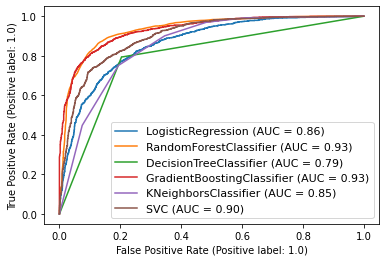

In [262]:
disp = plot_roc_curve(lr,X_test,y_test)
plot_roc_curve(rfc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)
plot_roc_curve(gb,X_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,X_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,X_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

#### Applying Hyperparameter Tuning in Random Forest Classifier.

In [272]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint
pprint(gb.get_params())

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [275]:
params = {'learning_rate':(0.1,0.2,0.3),
         'max_depth':(1,2,3,4),
         'n_estimators': (100,200,300,400),
         }
grid = GridSearchCV(GradientBoostingClassifier()
                    ,param_grid=params,cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': (0.1, 0.2, 0.3),
                         'max_depth': (1, 2, 3, 4),
                         'n_estimators': (100, 200, 300, 400)})

In [276]:
best_param = grid.best_params_
best_param

{'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 300}

In [278]:
gb_tuned=GradientBoostingClassifier(n_estimators=300,max_depth=2,learning_rate=0.3)
gb_tuned.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.3, max_depth=2, n_estimators=300)

In [279]:
y_pred_gb = gb_tuned.predict(X_test)
acc = accuracy_score(y_test,y_pred_gb)

print('TESTING SCORE : ', gb_tuned.score(X_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred_gb))
print('*****************************')
print(classification_report(y_test,y_pred_gb))

TESTING SCORE :  0.8595813204508856
ACCURACY : 0.8595813204508856
*****************************
[[1353  209]
 [ 227 1316]]
*****************************
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86      1562
         1.0       0.86      0.85      0.86      1543

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



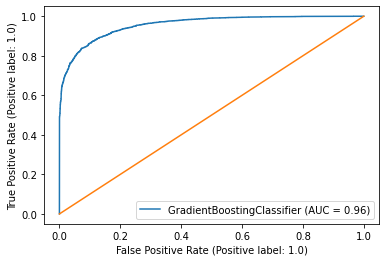

ROC_AUC_SCORE_GRADIENT_BOOSTING_Tuned : 0.8595405876607669


In [282]:
plot_roc_curve(gb_tuned,X_train,y_train)
plt.plot(y_test,y_test)
plt.show()
print('ROC_AUC_SCORE_GRADIENT_BOOSTING_Tuned :',roc_auc_score(y_test,gb_tuned.predict(X_test)))

#### Efficiency Achieved :

After, hyperparameter tuning we are able to increase roc_auc_score.

True Positive is increased in confusion matrix.


## Model Saving

In [285]:
import joblib
joblib.dump(gb_tuned,'Customer_churn.pkl')

['Customer_churn.pkl']

## Conclusion

1) I have seen in this analysis that how various factor effects the customer churn

2) I dealt with imbalance data (Target) and treated it.

3) After analysing i whole dataset i come into conclusion that:
    
    a)Gender and PhoneService are very less correlated with target.
    
    b)Contract, Tenure, Monthly charge, total charge are mostly corelated with our target.

4) Mostly  customer sees how economical the service is , so its better to provide value for money to our customers ,and improve our services to retain them.
    